 **HEKA Cardiovascular Diseases Competition**

These data are not homogeneous because they come from several hospitals not using the standard definitions for medical procedures. You can also have some aberrant values due to human health errors. You will therefore make sure to rinse them evenly before handling them.
Then from the train set, you will train your model in order to have the best F1-score possible. As soon as your model seems sufficiently accurate, you will evaluate your model with the test set and then submit your predictions in order to obtain your score.

Datos:
-	Numerical variables
o	BMI
o	Sleep time
o	Physical Health
o	Mental Health
o	Age

-	Cualitativas
o	Si/No
  	Smoking
  	Alcohol drinking
  	Stroke
  	Diff Walking
  	Diabetic
  	Physical Activity
  	Asthma
  	Kidney
  	Skin cancer
  	Heart Disease
o	Male/Female
  	Sex
o	CATEGORIAS
  	Race: White, Black, Hispanic,Other, American Indian/Alaskan Native, Asian
  	GenHealth: Good, very good, fair, excellent,poor



## **Importamos las librerías a utilizar**


In [ ]:
#Checamos la versión de Python instalada, pues necesitamos Python 3.5
import sys
assert sys.version_info >= (3, 5)

# y se requiere además una versión de Scikit-Learn ≥ 0.20
import sklearn
assert sklearn.__version__ >= "0.20"

#común
import numpy as np
import os
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
#formato
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from scipy.stats import norm
import seaborn as sns


# **INTRODUCCIÓN AL DATA SET**

## *Obtención y visualización de los datos*

In [ ]:
#leemos el CSV file
df = pd.read_csv('trainHEKA.csv')
#imprimimos para ver una previsualización de que datos manejaremos, en este caso veremos los primeros 5
df.head()

In [ ]:
# Otra forma de acceder a los datos es  accesar a las columnas
#print(df['Stroke'])
# o a la primera fila
#print(df.iloc[0])

Obtenemos la info de las columnas de nuestra base de datos. De esta forma,   podemos observar si contamos con las condiciones correctas para realizar el análisis estadístico

In [ ]:
df.info()
#info de nuestros datos


Contamos con los mismos valores para cada columna, y tenemos variables de tipo objeto y flotante.

* Asimismo, obtenemos una descripción general de los datos de las columnas con variables numéricas:*

In [ ]:
#obtenemos una descripción general de los datos
df.describe()


Analizamos algunas de las variables, mediante la función `df['variable'].value_counts()`

In [ ]:
df["Race"].value_counts()

In [ ]:
df["Diabetic"].value_counts()

En nuestro caso, nos interesan las variables: smoking, alcohol drinking, physical activity, gen health and sleep time

In [ ]:
df["GenHealth"].value_counts()

In [ ]:
df["Smoking"].value_counts()

Smoking
No     131578
Yes     92278
Name: count, dtype: int64

In [ ]:
df["AlcoholDrinking"].value_counts()

AlcoholDrinking
No     208595
Yes     15261
Name: count, dtype: int64

In [ ]:
df["SleepTime"].value_counts()

SleepTime
7 hrs       45705
8 hrs       45529
6 hrs       31060
480 min     22950
420 min     22682
360 min     15556
5 hrs        8953
9 hrs        7520
300 min      4482
540 min      3661
10 hrs       3622
4 hrs        3575
240 min      1873
600 min      1814
12 hrs       1023
3 hrs         944
720 min       500
180 min       452
2 hrs         374
1 hrs         255
120 min       185
11 hrs        180
60 min        130
16 hrs        116
14 hrs        116
660 min       113
15 hrs         90
840 min        56
960 min        55
18 hrs         52
900 min        50
13 hrs         47
20 hrs         36
780 min        20
1080 min       18
1200 min       15
24 hrs         12
17 hrs         11
1440 min        9
22 hrs          7
1020 min        2
1320 min        2
1260 min        1
19 hrs          1
1140 min        1
23 hrs          1
Name: count, dtype: int64

In [ ]:
df["PhysicalActivity"].value_counts()

PhysicalActivity
Yes    173406
No      50450
Name: count, dtype: int64

In [ ]:
df["HeartDisease"].value_counts()

HeartDisease
No     204695
Yes     19161
Name: count, dtype: int64

# **Análisis de Comportamiento de Salud**

- Analizar la prevalencia de comportamientos relacionados con la salud como el tabaquismo,
el consumo de alcohol, la actividad física y los patrones de sueño.
- Determinar qué comportamientos de salud son más comunes entre los
pacientes



Saving figure Histogramas iniciales


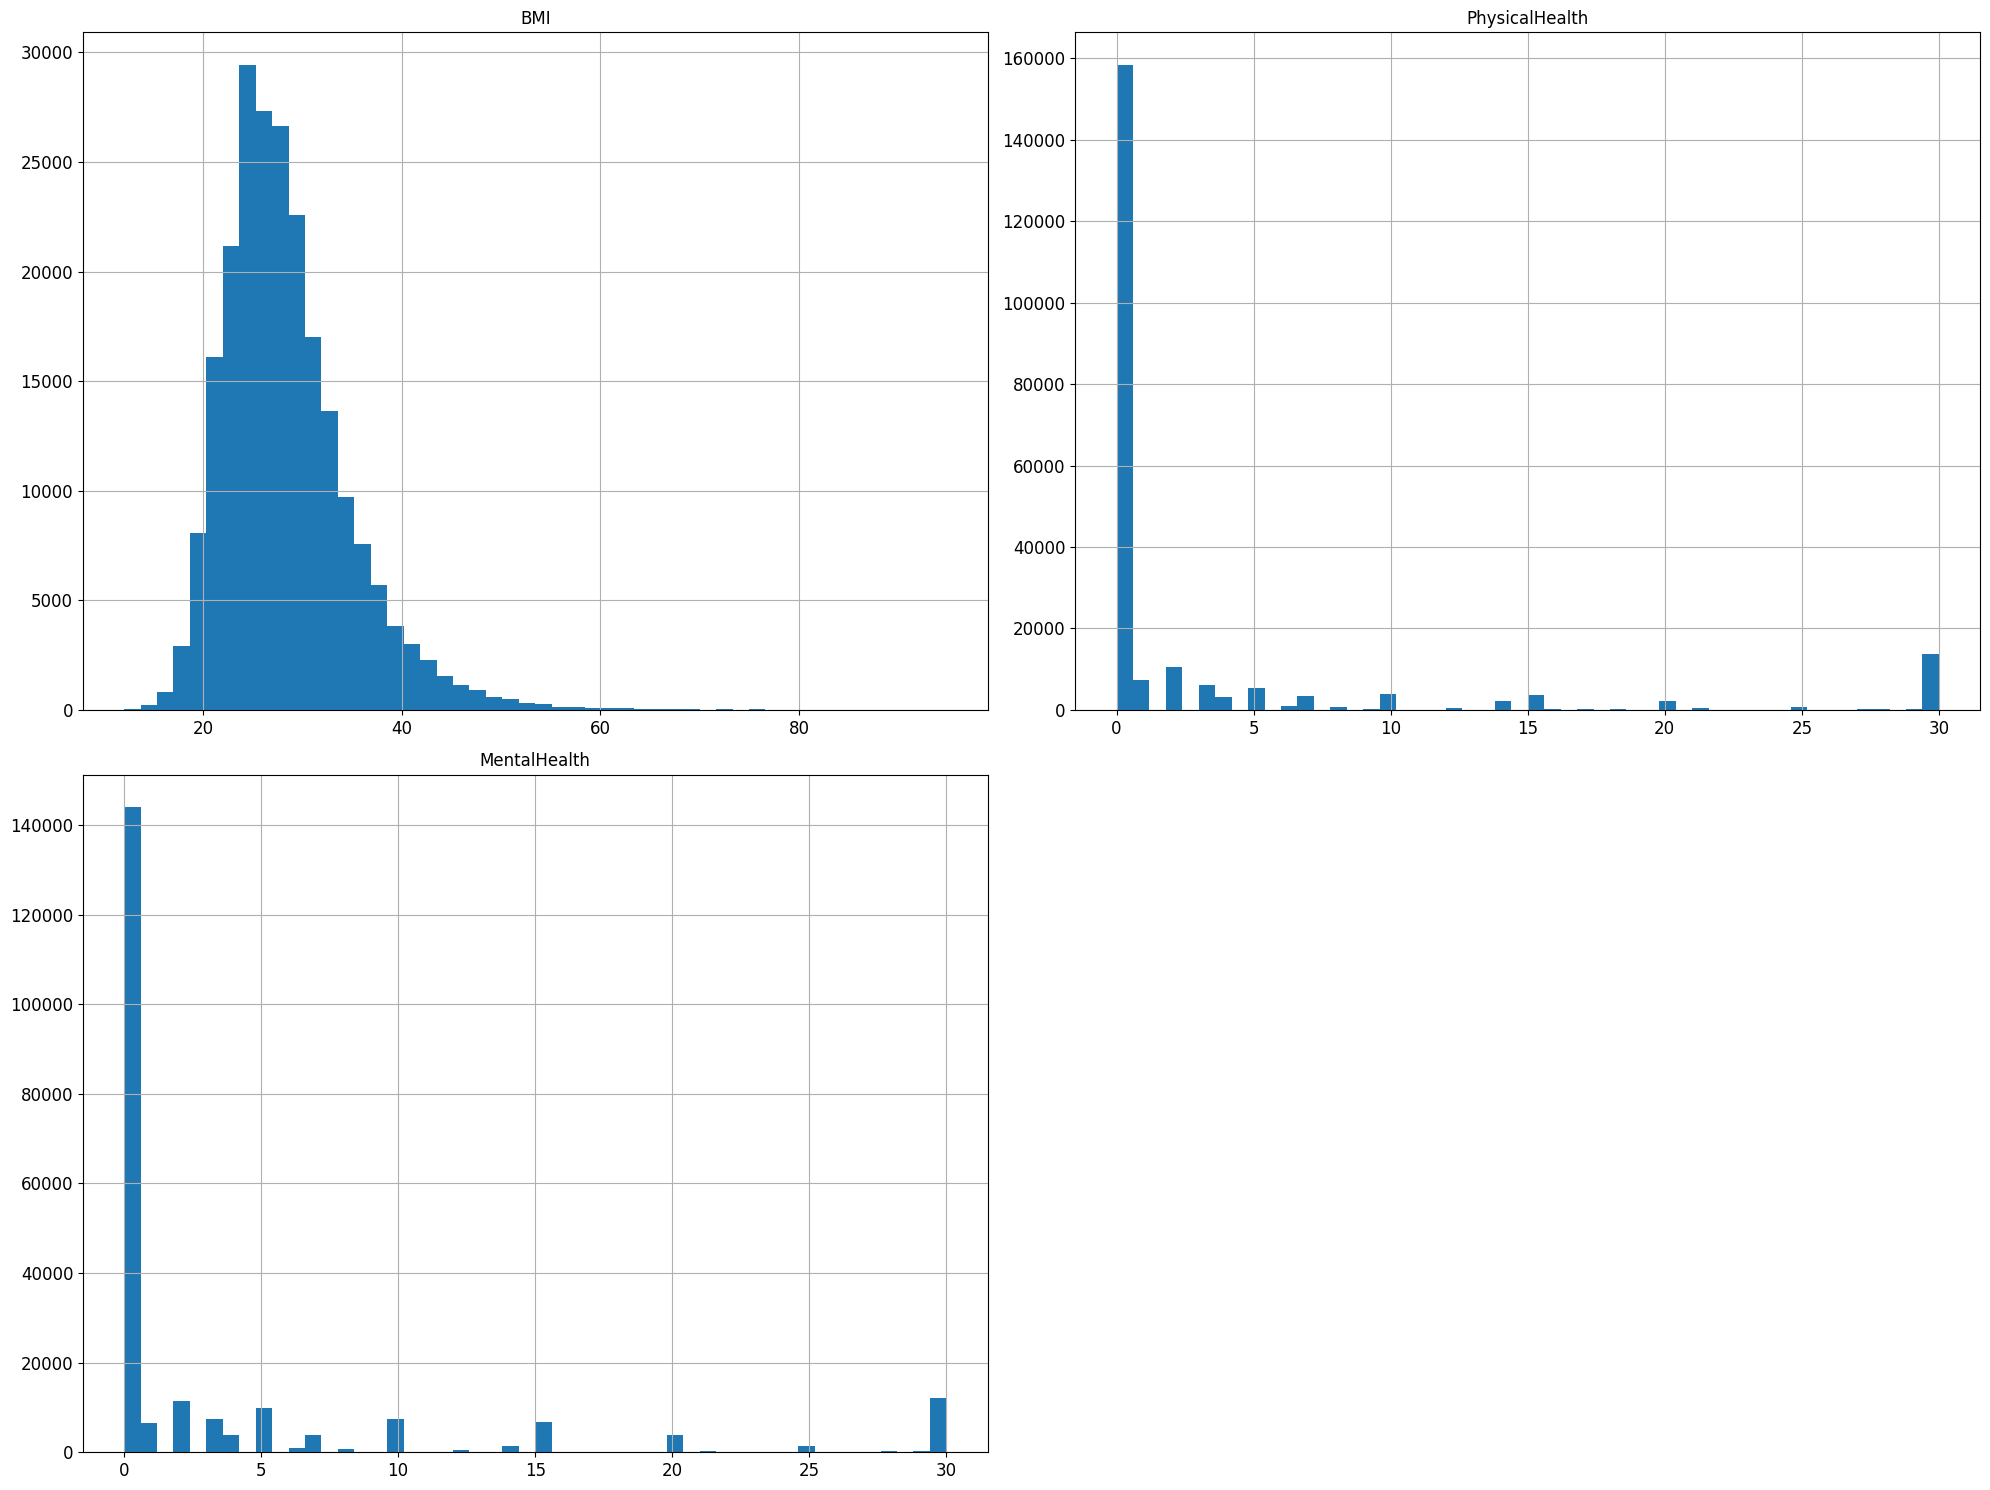

In [ ]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
save_fig("Histogramas iniciales")
plt.show()

  Si nos damos cuenta solo nos generó los histogramas de las variables númericas y no se encuentran normalizadas

---



Se busca una disribución normal en nuestros datos, por lo que para esos datos que no se encuentren distribuidos normalmente hay que modificarlos.

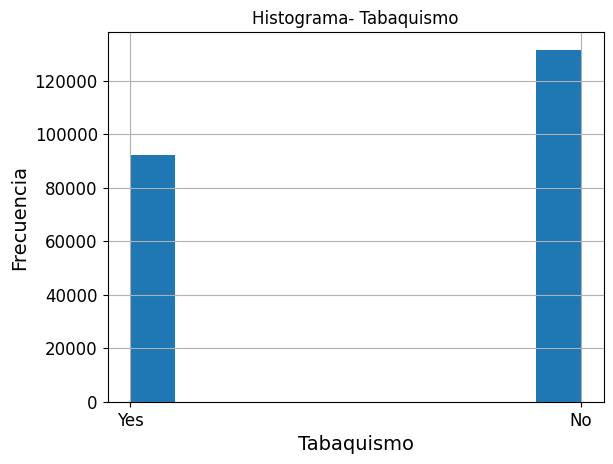

In [ ]:
df["Smoking"]. hist()
plt.title("Histograma- Tabaquismo")
plt.xlabel("Tabaquismo")
plt.ylabel("Frecuencia")
plt.show()

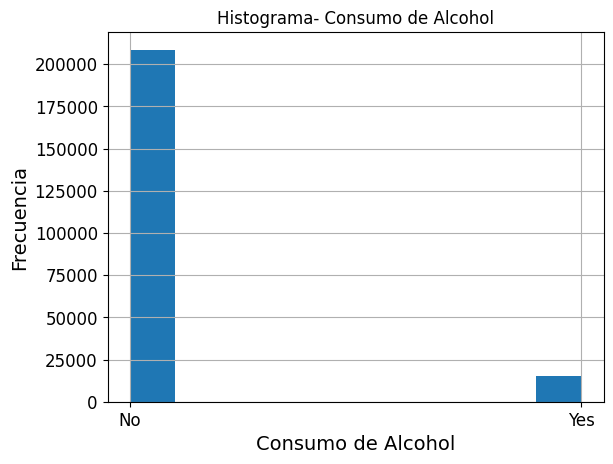

In [ ]:
df["AlcoholDrinking"]. hist()
plt.title("Histograma- Consumo de Alcohol")
plt.xlabel("Consumo de Alcohol")
plt.ylabel("Frecuencia")
plt.show()

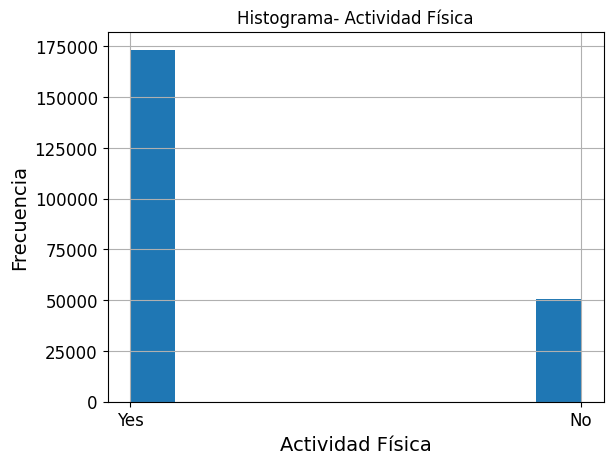

In [ ]:
df["PhysicalActivity"].hist()
plt.title("Histograma- Actividad Física")
plt.xlabel("Actividad Física")
plt.ylabel("Frecuencia")
plt.show()

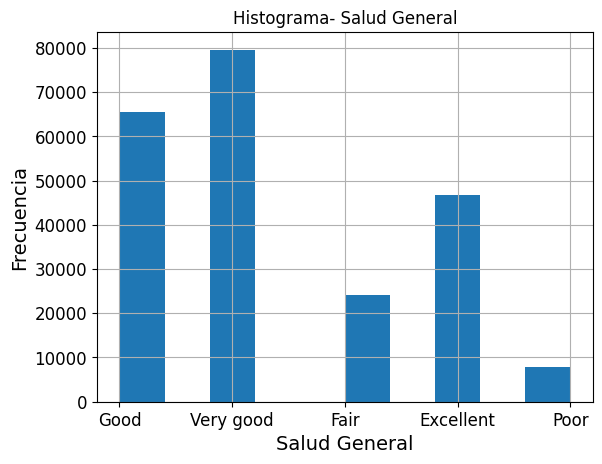

In [ ]:
df["GenHealth"].hist()
plt.title("Histograma- Salud General")
plt.xlabel("Salud General")
plt.ylabel("Frecuencia")
plt.show()

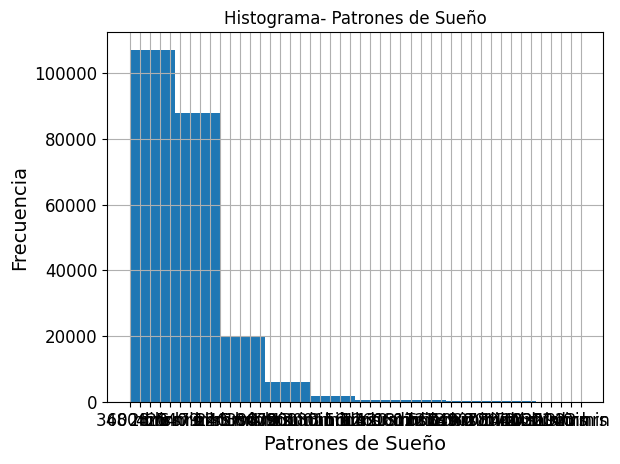

In [ ]:
df["SleepTime"].hist()
plt.title("Histograma- Patrones de Sueño")
plt.xlabel("Patrones de Sueño")
plt.ylabel("Frecuencia")
plt.show()

Análsis demográfico

*Relación entre los comportamientos de salud y la presencia de
enfermedades crónicas como enfermedades cardíacas o diabetes*

# **PREPROCESAMIENTO**
En este caso no tenemos valores nulos, así que nos saltamos ese paso
1. Codificación de características y ajuste de las variables
2. Normalización y Escalado de datos








In [ ]:
# Datos en un inicio:
df.head(10)

,Patient_ID,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,Patient_118020,45.61,Yes,No,No,0.0,0.0,No,Male,35-39,White,No,Yes,Good,360 min,No,No,No,No
1,Patient_196414,37.59,Yes,No,No,7.0,20.0,No,Female,30-34,Hispanic,No,Yes,Very good,480 min,No,No,No,No
2,Patient_107743,19.37,Yes,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Good,2 hrs,No,No,No,No
3,Patient_28303,48.42,No,No,No,30.0,15.0,No,Female,30-34,White,No,Yes,Fair,8 hrs,No,No,No,No
4,Patient_118489,27.12,No,No,No,0.0,5.0,No,Male,65-69,White,No,Yes,Very good,360 min,Yes,No,No,No
5,Patient_244335,33.84,Yes,No,No,0.0,5.0,Yes,Female,65-69,White,Yes,No,Very good,8 hrs,No,No,No,Yes
6,Patient_84792,18.79,No,No,No,0.0,15.0,No,Female,18-24,White,No,Yes,Very good,8 hrs,No,No,No,No
7,Patient_304542,24.54,Yes,No,No,0.0,5.0,No,Female,35-39,White,No,Yes,Good,480 min,Yes,No,No,No
8,Patient_43240,40.18,No,No,No,15.0,5.0,Yes,Female,50-54,Black,No,No,Fair,360 min,Yes,No,No,No
9,Patient_302226,34.92,No,No,No,10.0,0.0,No,Male,55-59,White,Yes,Yes,Good,8 hrs,No,No,No,No


## **1. Codificación de características y ajuste de las variables de cada columna**


###*Race, GenHealth, Age & Diabetes- Variable categorica*



In [ ]:
df.GenHealth.value_counts()

GenHealth
Very good    79591
Good         65411
Excellent    46712
Fair         24239
Poor          7903
Name: count, dtype: int64

In [ ]:

# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[["Excellent","Very good","Good","Fair","Poor"]])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(df[["GenHealth"]])
df[["GenHealth_cat"]] = encoder.transform(df[["GenHealth"]])
# dataframe.drop
df.drop(columns=["GenHealth"], inplace=True)

In [ ]:
#RAZA
encoder = OrdinalEncoder(categories=[[ "White", "Hispanic","Black", "Other","Asian","American Indian/Alaskan Native"]])
encoder.fit(df[["Race"]])
df["Race_cat"] = encoder.transform(df[["Race"]])
df.drop(columns=["Race"], inplace=True)


#DIABETES
encoder = OrdinalEncoder(categories=[[ "No", "No, borderline diabetes","Yes", "Yes (during pregnancy)"]])
encoder.fit(df[["Diabetic"]])
df["Diabetic_cat"] = encoder.transform(df[["Diabetic"]])
df.drop(columns=["Diabetic"], inplace=True)

#AGE CATEGORY
encoder = OrdinalEncoder(categories=[["18-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69",
                                      "70-74","75-79","80 or older"]])
encoder.fit(df[["AgeCategory"]])
df[["Age_cat"]] = encoder.transform(df[["AgeCategory"]])
df.drop(columns=["AgeCategory"], inplace=True)


luego de realizar los cambios, nos queda lo siguiente:

In [ ]:
df.head()

,Patient_ID,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease,GenHealth_cat,Race_cat,Diabetic_cat,Age_cat
0,Patient_118020,45.61,Yes,No,No,0.0,0.0,No,Male,Yes,360 min,No,No,No,No,2.0,0.0,0.0,3.0
1,Patient_196414,37.59,Yes,No,No,7.0,20.0,No,Female,Yes,480 min,No,No,No,No,1.0,1.0,0.0,2.0
2,Patient_107743,19.37,Yes,No,No,0.0,0.0,No,Female,Yes,2 hrs,No,No,No,No,2.0,0.0,0.0,6.0
3,Patient_28303,48.42,No,No,No,30.0,15.0,No,Female,Yes,8 hrs,No,No,No,No,3.0,0.0,0.0,2.0
4,Patient_118489,27.12,No,No,No,0.0,5.0,No,Male,Yes,360 min,Yes,No,No,No,1.0,0.0,0.0,9.0



### *Variables dicotomicas, Yes/No and Female/Male  --> 1/0*

In [ ]:
#PhysicalActivity
encoder = OrdinalEncoder(categories=[["No", "Yes"]])
# Ajustamos el codificador con la variable  y la transformamos
encoder.fit(df[["PhysicalActivity"]])
df["PhysicalActivity_enc"] = encoder.transform(df[["PhysicalActivity"]])
df.drop(columns=["PhysicalActivity"], inplace=True)

#DiffWalking
encoder = OrdinalEncoder(categories=[["No", "Yes"]])
encoder.fit(df[["DiffWalking"]])
df["DiffWalking_enc"] = encoder.transform(df[["DiffWalking"]])
df.drop(columns=["DiffWalking"], inplace=True)

#ASTHMA
encoder = OrdinalEncoder(categories=[["No", "Yes"]])
# Ajustamos el codificador con la variable  y la transformamos
encoder.fit(df[["Asthma"]])
df["Asthma_enc"] = encoder.transform(df[["Asthma"]])
df.drop(columns=["Asthma"], inplace=True)

#HEART DISEASE
encoder = OrdinalEncoder(categories=[["No", "Yes"]])
encoder.fit(df[["HeartDisease"]])
df["HeartDisease_enc"] = encoder.transform(df[["HeartDisease"]])
df.drop(columns=["HeartDisease"], inplace=True)

#STROKE
encoder = OrdinalEncoder(categories=[["No", "Yes"]])
encoder.fit(df[["Stroke"]])
df["Stroke_enc"] = encoder.transform(df[["Stroke"]])
df.drop(columns=["Stroke"], inplace=True)

#SKIN CANCER
encoder = OrdinalEncoder(categories=[["No", "Yes"]])
encoder.fit(df[["SkinCancer"]])
df["SkinCancer_enc"] = encoder.transform(df[["SkinCancer"]])
df.drop(columns=["SkinCancer"], inplace=True)

#KIDNEY DISEASE
encoder = OrdinalEncoder(categories=[["No", "Yes"]])
encoder.fit(df[["KidneyDisease"]])
df["KidneyDisease_enc"] = encoder.transform(df[["KidneyDisease"]])
df.drop(columns=["KidneyDisease"], inplace=True)

#ALCOHOL DRINKING
encoder = OrdinalEncoder(categories=[["No", "Yes"]])
# Ajustamos el codificador con la variable  y la transformamos
encoder.fit(df[["AlcoholDrinking"]])
df["AlcoholD_enc"] = encoder.transform(df[["AlcoholDrinking"]])
df.drop(columns=["AlcoholDrinking"], inplace=True)

#SMOKING
encoder = OrdinalEncoder(categories=[["No", "Yes"]])
# Ajustamos el codificador con la variable  y la transformamos
encoder.fit(df[["Smoking"]])
df["Smoking_enc"] = encoder.transform(df[["Smoking"]])
df.drop(columns=["Smoking"], inplace=True)

In [ ]:
#SEX
encoder = OrdinalEncoder(categories=[["Male", "Female"]])

# Ajustamos el codificador con la variable  y la transformamos
encoder.fit(df[["Sex"]])
df["Sex_enc"] = encoder.transform(df[["Sex"]])
df.drop(columns=["Sex"], inplace=True)



### *SleepTime*

In [ ]:
#SLEEP TIME
df['SleepTime'] = df['SleepTime'].astype(str)
df["SleepTime"] = df['SleepTime'].str.replace(' hrs', '')

def conversion_horas(value):
  if 'min' in value:
    minutos = int(value.replace(' min', ''))
    horas = minutos / 60
    return horas
  else:
    return value

df['SleepTime'] = df["SleepTime"].apply(conversion_horas)
df['SleepTime'] = df['SleepTime'].astype(float)
df['SleepTime'] = df['SleepTime'] / 24
df.head(10)

,Patient_ID,BMI,PhysicalHealth,MentalHealth,SleepTime,GenHealth_cat,Race_cat,Diabetic_cat,Age_cat,PhysicalActivity_enc,DiffWalking_enc,Asthma_enc,HeartDisease_enc,Stroke_enc,SkinCancer_enc,KidneyDisease_enc,AlcoholD_enc,Smoking_enc,Sex_enc
0,Patient_118020,45.61,0.0,0.0,0.250000,2.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Patient_196414,37.59,7.0,20.0,0.333333,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,Patient_107743,19.37,0.0,0.0,0.083333,2.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,Patient_28303,48.42,30.0,15.0,0.333333,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Patient_118489,27.12,0.0,5.0,0.250000,1.0,0.0,0.0,9.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Patient_244335,33.84,0.0,5.0,0.333333,1.0,0.0,2.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
6,Patient_84792,18.79,0.0,15.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,Patient_304542,24.54,0.0,5.0,0.333333,2.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
8,Patient_43240,40.18,15.0,5.0,0.250000,3.0,2.0,0.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,Patient_302226,34.92,10.0,0.0,0.333333,2.0,0.0,2.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### *Filtro de la columna ID*

In [ ]:
#Se extraen los elementos tipo str del ID y nos quedamos con los valores int
df["Patient_ID"] = df["Patient_ID"].str.extract(r"(\d+)").astype(int)


 Datos luego de ser procesados

In [ ]:
# Datos al final:
df.head(10)

,Patient_ID,BMI,PhysicalHealth,MentalHealth,SleepTime,GenHealth_cat,Race_cat,Diabetic_cat,Age_cat,PhysicalActivity_enc,DiffWalking_enc,Asthma_enc,HeartDisease_enc,Stroke_enc,SkinCancer_enc,KidneyDisease_enc,AlcoholD_enc,Smoking_enc,Sex_enc
0,118020,45.61,0.0,0.0,0.250000,2.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,196414,37.59,7.0,20.0,0.333333,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,107743,19.37,0.0,0.0,0.083333,2.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,28303,48.42,30.0,15.0,0.333333,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,118489,27.12,0.0,5.0,0.250000,1.0,0.0,0.0,9.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,244335,33.84,0.0,5.0,0.333333,1.0,0.0,2.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
6,84792,18.79,0.0,15.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,304542,24.54,0.0,5.0,0.333333,2.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
8,43240,40.18,15.0,5.0,0.250000,3.0,2.0,0.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,302226,34.92,10.0,0.0,0.333333,2.0,0.0,2.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **2. Checamos la normalización de las variables**

El histograma es una herramienta que nos permite revisar la distribución normal de las variables así como también nos puede permitir ver si hay outliners.

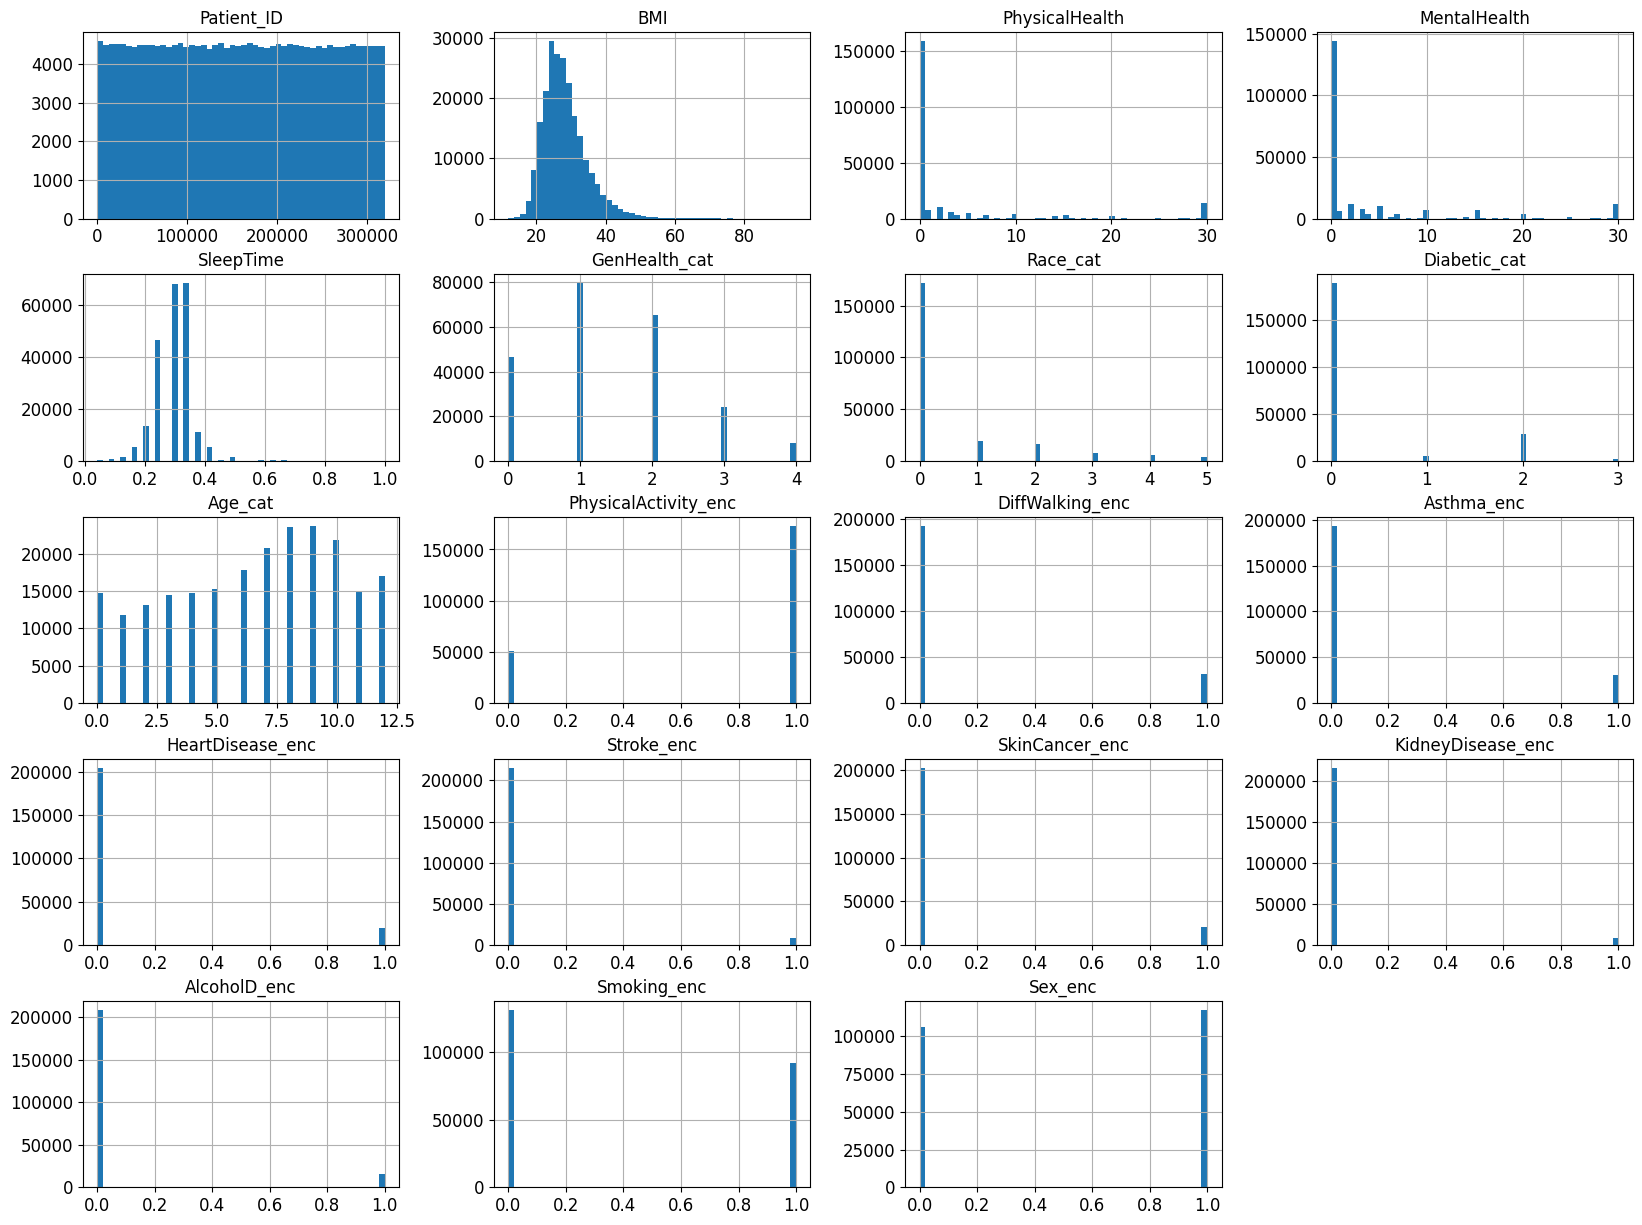

In [ ]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

**MaxAbsScaler** escala y traslada cada característica del array de entrada de forma que el valor absoluto máximo de cada una sea 1.0 (es decir, todas las características pasan a tener valores en el rango [-1, 1]). El array de entrada debe ser de números reales (enteros o de tipo float)
https://interactivechaos.com/es/manual/tutorial-de-machine-learning/maxabsscaler

**BOXCOX**, nos ayuda a transformar datos no normales a datos con distribución normal. Permitiendonos mejorar la predicción usando regresión lineal

Después de escalar los datos con MaxAbsScaler, aplicamos la transformación Box-Cox para hacer que los datos sigan una distribución más normal.
Utilizamos np.empty_like para inicializar un arreglo vacío con la misma forma que scaled_data.
Iteramos sobre cada columna de scaled_data y aplicamos la transformación Box-Cox utilizando scipy.stats.boxcox.
Convertimos el resultado transformado de nuevo a un DataFrame de pandas (transformed_df).
Imprimimos las primeras filas del DataFrame transformado usando .head().

In [ ]:
from scipy.stats import boxcox
from sklearn.preprocessing import MaxAbsScaler

# Columnas a transformar
columns_to_transform = ['SleepTime', "BMI","PhysicalHealth","MentalHealth","Race_cat","Diabetic_cat","GenHealth_cat","Age_cat"]

# Crear una copia del DataFrame para realizar las transformaciones
df_copy = df.copy()

# Aplicar Box-Cox Transformation
for column in columns_to_transform:
    # Box-Cox requiere que todos los valores sean positivos. Agregamos 1 para asegurar esto.
    df_copy[column], _ = boxcox(df_copy[column] + 1)

# Aplicar MaxAbsScaler
scaler = MaxAbsScaler()
df_copy[columns_to_transform] = scaler.fit_transform(df_copy[columns_to_transform])


# Verificar el número de registros después de eliminar los outliers
print(f'Number of records after transformations: {len(df_copy)}')

Number of records after transformations: 223856


In [ ]:
# Mostrar los primeros registros del DataFrame transformado
df_copy.head()

,Patient_ID,BMI,PhysicalHealth,MentalHealth,SleepTime,GenHealth_cat,Race_cat,Diabetic_cat,Age_cat,PhysicalActivity_enc,DiffWalking_enc,Asthma_enc,HeartDisease_enc,Stroke_enc,SkinCancer_enc,KidneyDisease_enc,AlcoholD_enc,Smoking_enc,Sex_enc
0,118020,0.970358,0.000000,0.000000,0.350168,0.606238,0.000000,0.0,0.256125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,196414,0.959873,0.945688,0.982633,0.446197,0.349076,0.911234,0.0,0.171643,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,107743,0.912491,0.000000,0.000000,0.128928,0.606238,0.000000,0.0,0.506659,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,28303,0.973345,1.000000,0.966018,0.446197,0.817461,0.000000,0.0,0.171643,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,118489,0.938968,0.000000,0.852805,0.350168,0.349076,0.000000,0.0,0.754311,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Podemos confirmar la distribución de las características con el método describe, que ofrece información estadística del DataFrame:



In [ ]:
df_copy.describe()

,Patient_ID,BMI,PhysicalHealth,MentalHealth,SleepTime,GenHealth_cat,Race_cat,Diabetic_cat,Age_cat,PhysicalActivity_enc,DiffWalking_enc,Asthma_enc,HeartDisease_enc,Stroke_enc,SkinCancer_enc,KidneyDisease_enc,AlcoholD_enc,Smoking_enc,Sex_enc
count,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000
mean,159639.127511,0.939456,0.258492,0.301863,0.401755,0.425074,0.223861,0.156580,0.547315,0.774632,0.138634,0.134582,0.085595,0.037488,0.093167,0.036863,0.068173,0.412220,0.524632
std,92385.084641,0.014475,0.408266,0.414842,0.068212,0.278728,0.406346,0.362715,0.296404,0.417825,0.345565,0.341277,0.279766,0.189956,0.290667,0.188426,0.252044,0.492236,0.499394
min,2.000000,0.864623,0.000000,0.000000,0.066228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,79631.500000,0.930072,0.000000,0.000000,0.350168,0.349076,0.000000,0.000000,0.340051,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,159574.500000,0.939487,0.000000,0.000000,0.399242,0.349076,0.000000,0.000000,0.589470,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,239590.250000,0.948884,0.773269,0.764408,0.446197,0.606238,0.000000,0.000000,0.754311,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,319795.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Al observar los valores de min y max, podemos observar que en todos los casos el valor max es de 1 y el valor min es proporcional a este valor max

##  Histogramas que prueban la normalización

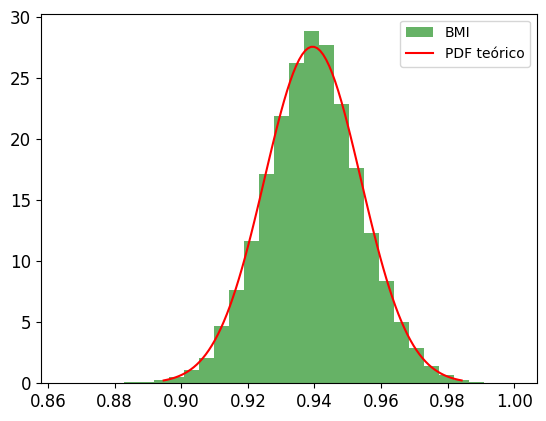

In [ ]:
# Define the distribution
dist = norm(loc=0.939456, scale=0.014475)

# Generate values for the theoretical PDF
x = np.linspace(dist.ppf(0.001), dist.ppf(0.999), 100)

# Plot the histogram of the BMI data
plt.hist(df_copy['BMI'], density=True, bins=30, alpha=0.6, color='g', label='BMI')

# Plot the theoretical PDF
plt.plot(x, dist.pdf(x), 'r-', label='PDF teórico')

# Add legend
plt.legend()

# Show plot
plt.show()


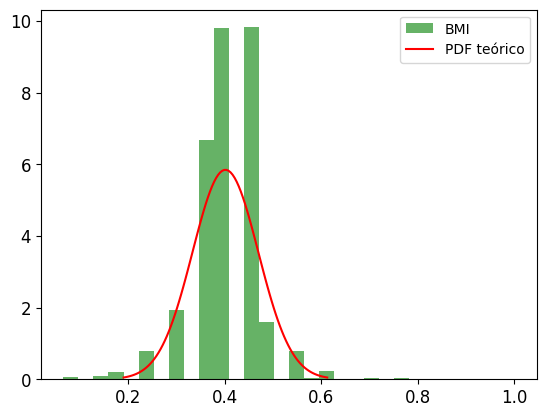

In [ ]:
# Define the distribution
dist = norm(loc=0.401755, scale=0.068212)

# Generate values for the theoretical PDF
x = np.linspace(dist.ppf(0.001), dist.ppf(0.999), 100)

# Plot the histogram of the BMI data
plt.hist(df_copy['SleepTime'], density=True, bins=30, alpha=0.6, color='g', label='BMI')

# Plot the theoretical PDF
plt.plot(x, dist.pdf(x), 'r-', label='PDF teórico')

# Add legend
plt.legend()

# Show plot
plt.show()


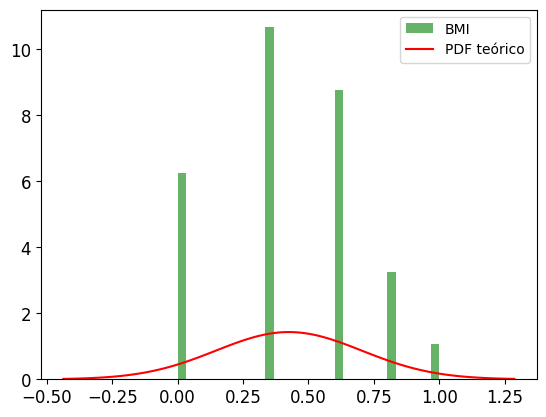

In [ ]:
# Define the distribution
dist = norm(loc=0.425074, scale=0.278728)
# Generate values for the theoretical PDF
x = np.linspace(dist.ppf(0.001), dist.ppf(0.999), 100)

# Plot the histogram of the BMI data
plt.hist(df_copy['GenHealth_cat'], density=True, bins=30, alpha=0.6, color='g', label='BMI')

# Plot the theoretical PDF
plt.plot(x, dist.pdf(x), 'r-', label='PDF teórico')

# Add legend
plt.legend()

# Show plot
plt.show()



Saving figure Histogramas_normalizadas


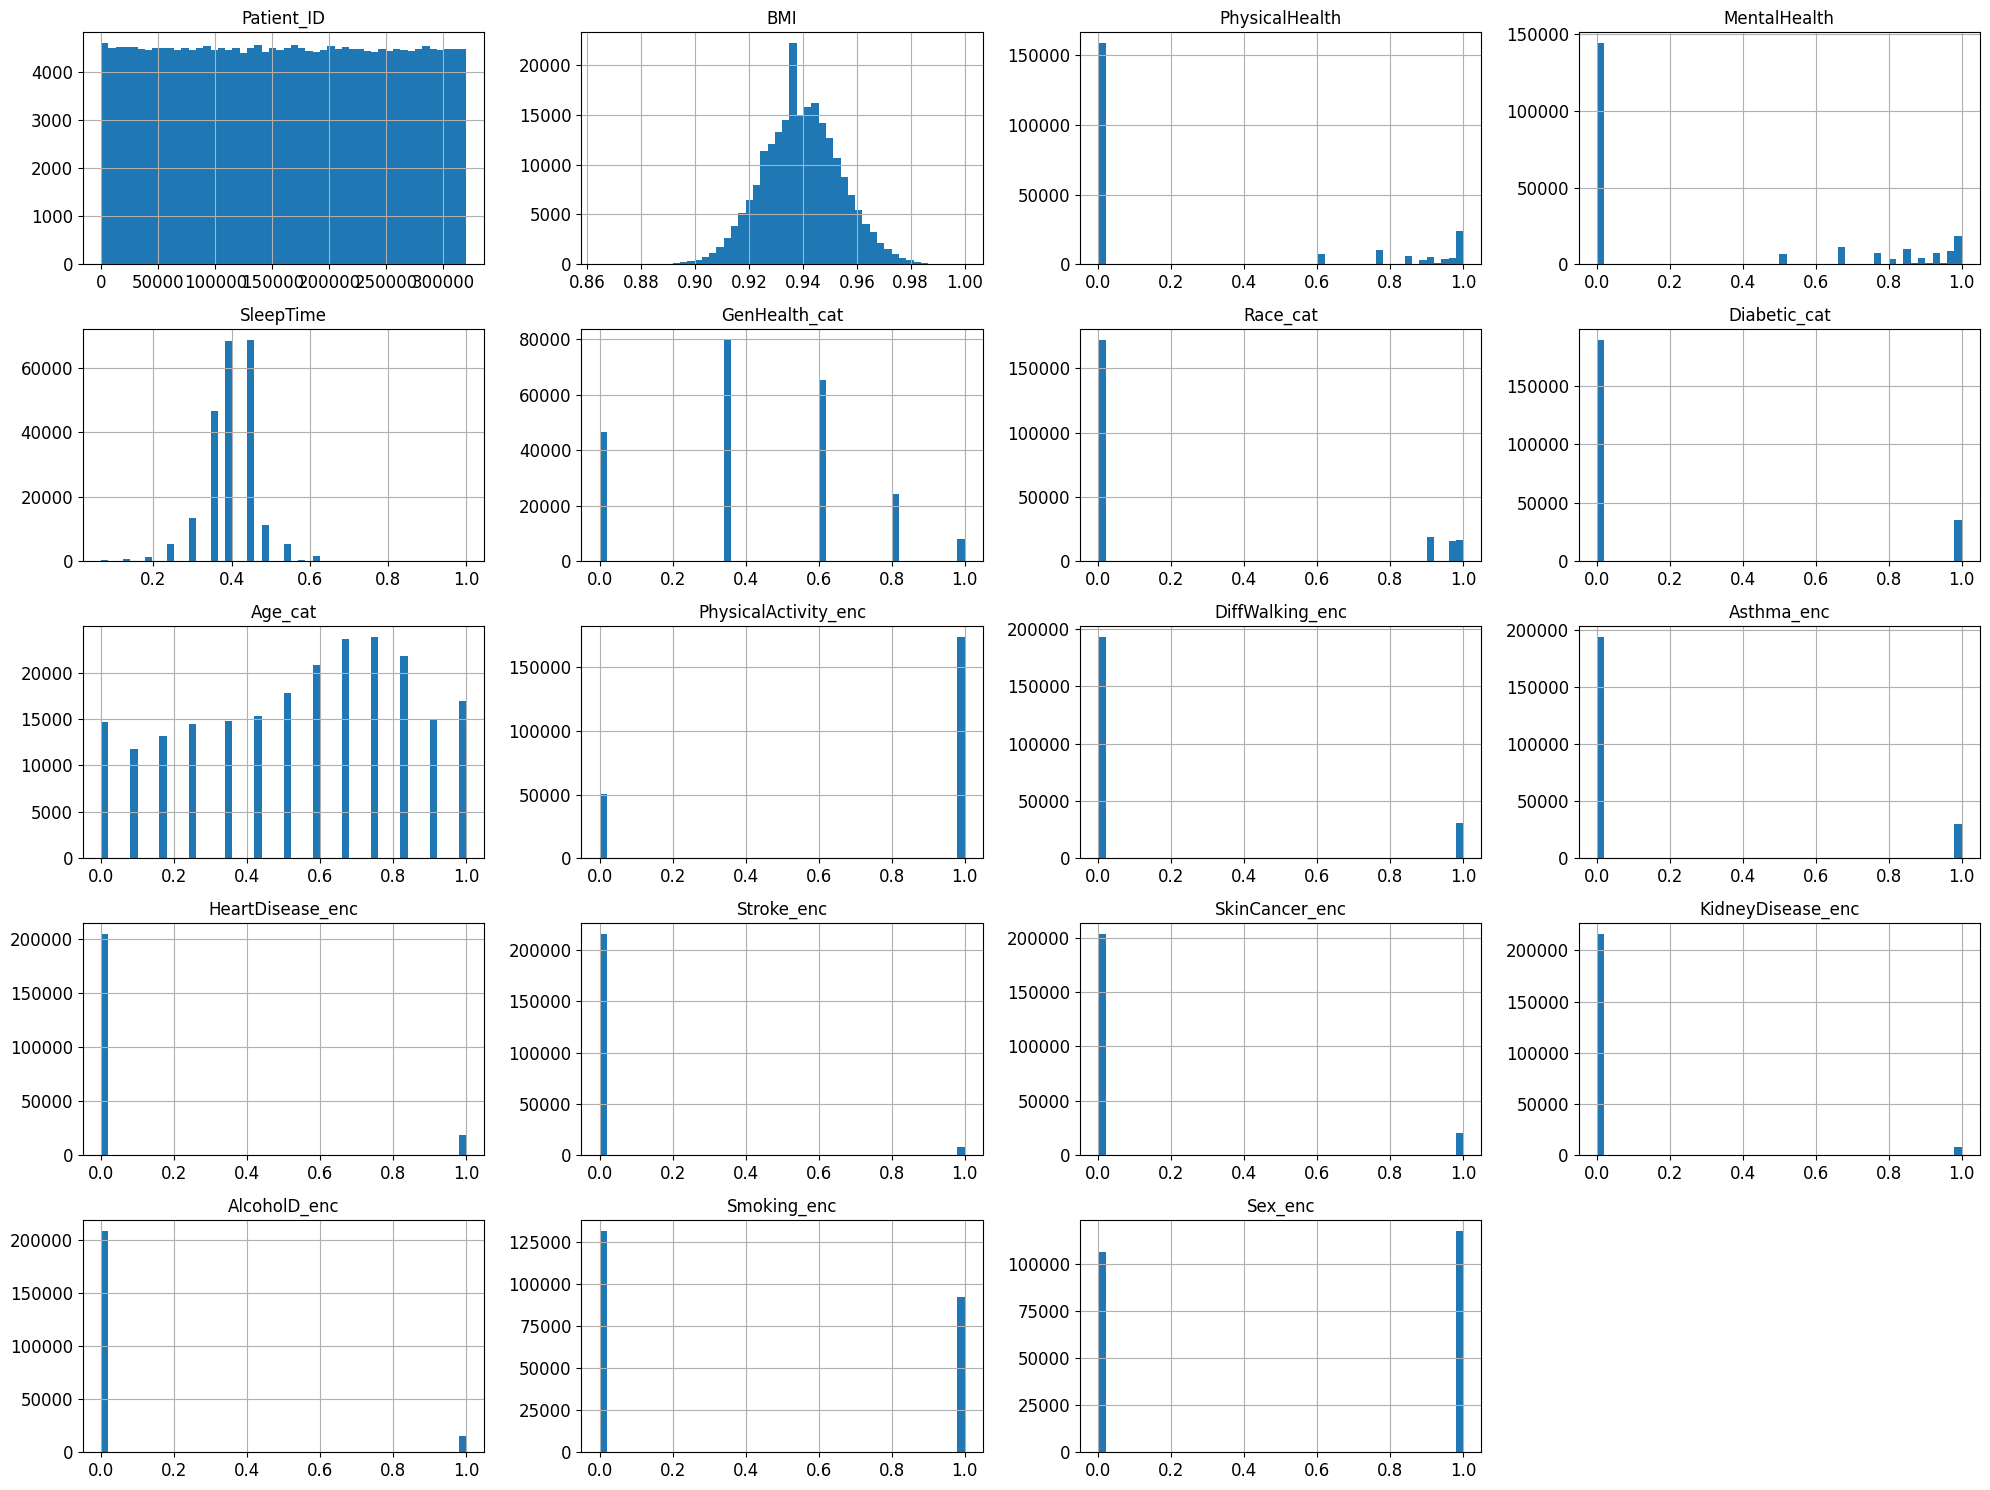

In [ ]:
%matplotlib inline
df_copy.hist(bins=50, figsize=(20,15))
save_fig("Histogramas_normalizadas")
plt.show()

In [ ]:
corr_matrix = df_copy.corr()
corr_matrix["HeartDisease_enc"].sort_values(ascending=False)

HeartDisease_enc        1.000000
Age_cat                 0.231879
GenHealth_cat           0.227185
DiffWalking_enc         0.200430
Stroke_enc              0.195327
Diabetic_cat            0.169842
KidneyDisease_enc       0.145813
PhysicalHealth          0.136189
Smoking_enc             0.107095
SkinCancer_enc          0.094532
BMI                     0.052144
Asthma_enc              0.041467
SleepTime               0.003581
Patient_ID             -0.002803
MentalHealth           -0.007529
AlcoholD_enc           -0.031186
Race_cat               -0.038697
Sex_enc                -0.071285
PhysicalActivity_enc   -0.099924
Name: HeartDisease_enc, dtype: float64

#**CREACIÓN DEL TEST SET**



En este caso, se utilizó el valor de 0.2 debido a que:
* 20% de nuestros datos --> se usarán para el test set y el
* 80% de los datos --> training set

In [ ]:
 ##Se divide el dataframe(df) en dos conjuntos aleatorios, train y test set donde el 0.2 representa que el 20% se asignan al test y 80% al train
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
test_set.head(10)

,Patient_ID,BMI,PhysicalHealth,MentalHealth,SleepTime,GenHealth_cat,Race_cat,Diabetic_cat,Age_cat,PhysicalActivity_enc,DiffWalking_enc,Asthma_enc,HeartDisease_enc,Stroke_enc,SkinCancer_enc,KidneyDisease_enc,AlcoholD_enc,Smoking_enc,Sex_enc
190914,86572,36.61,0.0,0.0,0.291667,2.0,0.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
150762,64481,25.02,0.0,0.0,0.291667,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
189532,280532,40.73,0.0,0.0,0.291667,1.0,0.0,2.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82258,314988,20.60,0.0,0.0,0.291667,3.0,4.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
181317,115837,25.66,25.0,15.0,0.375000,1.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
134118,295207,20.80,0.0,0.0,0.333333,1.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
146923,217859,29.12,0.0,0.0,0.416667,2.0,0.0,0.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
199776,34295,29.53,12.0,0.0,0.333333,1.0,0.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
223251,49163,21.77,0.0,4.0,0.333333,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166226,312027,27.26,2.0,30.0,0.291667,2.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#como podemos observar se tomaron filas aleatorias para el train set
train_set.head(10)

,Patient_ID,BMI,PhysicalHealth,MentalHealth,SleepTime,GenHealth_cat,Race_cat,Diabetic_cat,Age_cat,PhysicalActivity_enc,DiffWalking_enc,Asthma_enc,HeartDisease_enc,Stroke_enc,SkinCancer_enc,KidneyDisease_enc,AlcoholD_enc,Smoking_enc,Sex_enc
41894,288080,33.25,0.0,10.0,0.250000,2.0,0.0,2.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7777,18900,25.69,0.0,0.0,0.333333,1.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56778,222504,28.25,0.0,0.0,0.416667,0.0,0.0,1.0,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
144927,94710,29.53,0.0,0.0,0.291667,2.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20764,305719,28.29,0.0,0.0,0.291667,1.0,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
100439,262585,42.86,0.0,0.0,0.291667,2.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25866,150843,19.01,30.0,15.0,0.375000,2.0,0.0,0.0,11.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
47862,66654,31.75,28.0,0.0,0.208333,2.0,3.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7469,133047,44.29,0.0,2.0,0.250000,2.0,0.0,0.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
46641,165098,19.53,0.0,0.0,0.333333,0.0,0.0,0.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
# imprimimos la cantidad de datos del trainset y del test set
len(train_set)

179084

In [ ]:
len(test_set)

44772

In [ ]:
#Copiamos el train set para realizar pruebas
df = train_set.copy()

# **Análisis entre variables**

## *Correlación de Pearson*

In [ ]:
corr_matrix=df.corr()

Se encontraron mejores resultados utilizando pearson, muy similares pero variaba por una o media decima

In [ ]:
corr_matrix["HeartDisease_enc"].sort_values(ascending=False)

HeartDisease_enc        1.000000
GenHealth_cat           0.243208
Age_cat                 0.232269
DiffWalking_enc         0.200164
Stroke_enc              0.195625
PhysicalHealth          0.167784
Diabetic_cat            0.166170
KidneyDisease_enc       0.143548
Smoking_enc             0.107411
SkinCancer_enc          0.094097
BMI                     0.049584
Asthma_enc              0.041812
MentalHealth            0.027097
SleepTime               0.007990
Patient_ID             -0.003830
Race_cat               -0.025182
AlcoholD_enc           -0.031654
Sex_enc                -0.071933
PhysicalActivity_enc   -0.100352
Name: HeartDisease_enc, dtype: float64

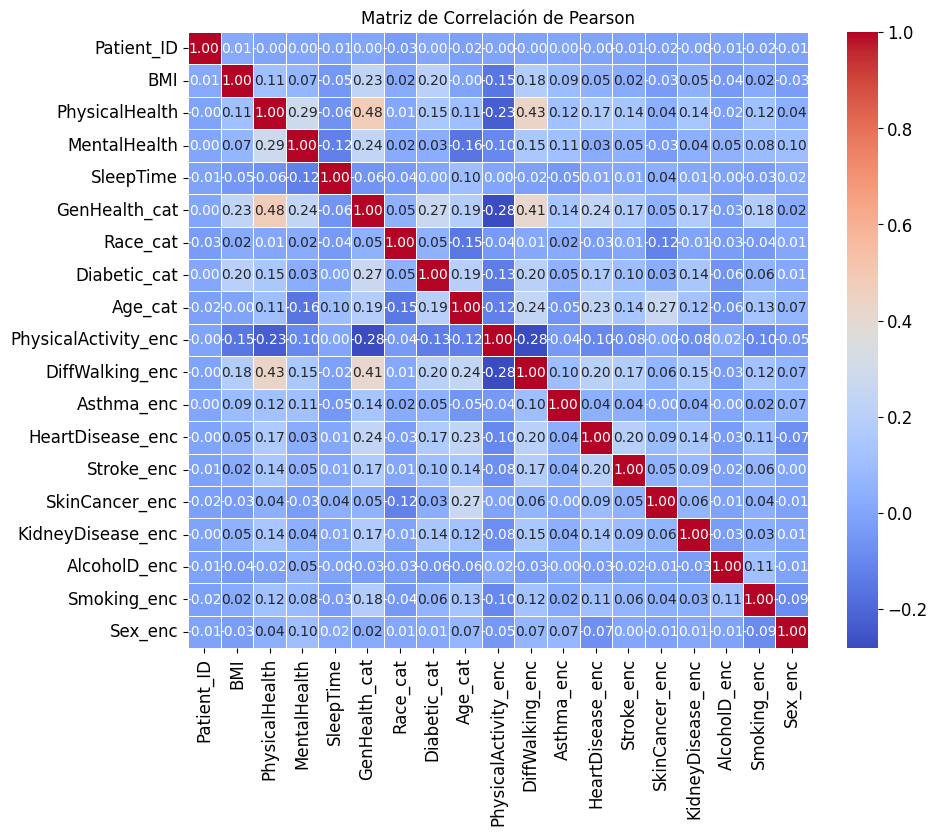

In [ ]:
corr_matrix = df.corr(method='pearson')

# Crear el heatmap
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura según tus necesidades
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de Pearson')
plt.show()

*Relación entre los comportamientos de salud y enfermedades crónicas*
- Investigar cualquier relación entre los comportamientos de salud y la presencia de enfermedades crónicas como enfermedades cardíacas o diabetes.

Se pueden observar las relaciones en la gráfica


Preparar los datos de prueba

In [ ]:
df_labels = train_set["HeartDisease_enc"].copy()
df=train_set.drop("HeartDisease_enc", axis=1)

In [ ]:
X_test = test_set.drop("HeartDisease_enc", axis=1)
y_test = test_set["HeartDisease_enc"]

# **ENTRENAMIENTO Y EVALUACIÓN** - en proceso

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(df, df_labels)

LinearRegression()

In [ ]:
>>> some_data = df.iloc[:5]
>>> some_labels =df_labels.iloc[:5]
>>> some_data_prepared = df
>>> print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 0.17291149  0.00536338  0.2872419  ... -0.02758801  0.08819745
  0.11273107]


 Grid search is a method for hyperparameter optimization that systematically evaluates all possible combinations of hyperparameter values within a predefined grid to find the best-performing set of hyperparameters.

In [ ]:

from sklearn.model_selection import RandomizedSearchCV



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier



In [ ]:
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10], #20,30
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
# Configurar y ejecutar Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

grid_search.fit(df, df_labels)

# Ver los mejores parámetros y evaluar el modelo
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo en el conjunto de prueba: {accuracy:.2f}")


Fitting 3 folds for each of 32 candidates, totalling 96 fits


KeyboardInterrupt: 

In [ ]:

# Definir el modelo y los parámetros para Randomized Search
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Configurar y ejecutar Randomized Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42)

random_search.fit(df, df_labels)

# Ver los mejores parámetros y evaluar el modelo
print("Mejores hiperparámetros encontrados:", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo en el conjunto de prueba: {accuracy:.2f}")


# Pruebas pendientes